# Student Performance Analysis
In this jupyter notebook, we analyse student performance dataset to gain key insights that could help build a regression model.

---

**Lecturer: Marcos Bittencourt**<br></br>
**Module: DATA 2204 - Statistical Pred Modelling**
**Final Project**

---

# Table of Contents:
* [1. Business Problem Description](#problem-description)
* [2. Feature Engineering and Exploratory Data Analysis](#eda)
    * [2.1 Dataset Information](#dataset-information)
    * [2.2 Loading Data](#loading-data)
    * [2.3 Exploratory Data Analysis](#eda-2)
* [3. Classifiers and Datasets](#class-data)
    * [3.1 Data Preparation](#data-prep)
    * [3.2 Model Training](#model-train)
* [4. Model Evaluation](#model-eval)

---

<a id="problem-description"></a>
# 1. Business Problem Description

The Ministry of Education would like to carry out an analysis of the student's performance. The would like to gain insights into the datasets provided to enable building a regression model to forecast the final grade (`G3`) of a student.

Problem Statement:
> **Use insights from Exploratory Data Analysis to create a regression model that forecasts the final grade (`G3`) of a student and compare the results with an external dataset.**

<a id="eda"></a>
# 2. Feature Engineering and Exploratory Data Analysis

<a id="dataset-information"></a>
## 2.1 Dataset Background Information
Two data files are provided, one for each for `Math` and `Portuguese` courses.
The dataset is available on the [UCI Machine Learning Repository website](https://archive.ics.uci.edu/ml/datasets/student+performance).

[![UCI-screenshot](../images/student-uci-screenshot.png)](https://archive.ics.uci.edu/ml/datasets/student+performance)

### Independent Variables

> Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 

1. `school` - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2. `sex` - student's sex (binary: 'F' - female or 'M' - male) 
3. `age` - student's age (numeric: from 15 to 22) 
4. `address` - student's home address type (binary: 'U' - urban or 'R' - rural) 
5. `famsize` - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6. `Pstatus` - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7. `Medu` - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 -  secondary education or 4 - higher education) 
8. `Fedu` - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 -  secondary education or 4 - higher education) 
9. `Mjob` - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10. `Fjob` - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11. `reason` - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12. `guardian` - student's guardian (nominal: 'mother', 'father' or 'other') 
13. `traveltime` - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14. `studytime` - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15. `failures` - number of past class failures (numeric: n if 1<=n<3, else 4) 
16. `schoolsup` - extra educational support (binary: yes or no) 
17. `famsup` - family educational support (binary: yes or no) 
18. `paid` - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19. `activities` - extra-curricular activities (binary: yes or no) 
20. `nursery` - attended nursery school (binary: yes or no) 
21. `higher` - wants to take higher education (binary: yes or no) 
22. `internet` - Internet access at home (binary: yes or no) 
23. `romantic` - with a romantic relationship (binary: yes or no) 
24. `famrel` - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25. `freetime` - free time after school (numeric: from 1 - very low to 5 - very high) 
26. `goout` - going out with friends (numeric: from 1 - very low to 5 - very high) 
27. `Dalc` - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28. `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29. `health` - current health status (numeric: from 1 - very bad to 5 - very good) 
30. `absences` - number of school absences (numeric: from 0 to 93) 

> These grades are related with the course subject, Math or Portuguese: 
31. `G1` - first period grade (numeric: from 0 to 20) 
31. `G2` - second period grade (numeric: from 0 to 20) 
32. `G3` - final grade (numeric: from 0 to 20, output target)

### Dependent Variable
- `G3`: final grade (numeric: from 0 to 20, output target)

<a id="loading-data"></a>
## 2.2 Loading Data

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display, IFrame
import sweetviz as sv

import os
import pathlib
import json
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define location of the data
data_dir = '../data'
math_filename = 'student-math.csv'
port_filename = 'student-language.csv'
math_data_path = os.path.join(data_dir, math_filename)
port_data_path = os.path.join(data_dir, port_filename)

if not pathlib.Path(math_data_path).exists():
    raise FileNotFoundError('No file for Math Course found at defined location.')
    
if not pathlib.Path(port_data_path).exists():
    raise FileNotFoundError('No file for Portuguese Course found at defined location.')

In [3]:
# Load data into a pandas DataFrame
math_data = pd.read_csv(math_data_path, sep=';')
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Load data into a pandas DataFrame
port_data = pd.read_csv(port_data_path, sep=';')
port_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


The datasets will be combined by adding a column that will identify the course.
> `course`: `math` or `portuguese`

In [5]:
# Combining the datasets
math_data['course'] = 'math'
port_data['course'] = 'portuguese'

data = pd.concat([math_data, port_data])
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


<a id="eda-2"></a>
## 2.3 Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

> We can see that there are a total of 33 predictor variables and 1 response (output) variable (`G3`)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


In [8]:
data['course'].value_counts()

portuguese    649
math          395
Name: course, dtype: int64

In [9]:
# Generate three SweetViz reports.
if not pathlib.Path("SWEETVIZ_REPORT.html").exists():
    sv_report = sv.analyze(data, target_feat='G3')
    sv_report.show_html()

# if not pathlib.Path("SWEETVIZ_REPORT-math.html").exists():
#     sv_report = sv.analyze(data[data['course']=='math'], target_feat='G3')
#     sv_report.show_html()
    
# if not pathlib.Path("SWEETVIZ_REPORT-portuguese.html").exists():
#     sv_report = sv.analyze(data[data['course']=='portuguese'], target_feat='G3')
#     sv_report.show_html()

In [10]:
# Average scores for each course
groupby_course = data.groupby('course').mean()
groupby_course.T

course,math,portuguese
age,16.696203,16.744222
Medu,2.749367,2.514638
Fedu,2.521519,2.306626
traveltime,1.448101,1.568567
studytime,2.035443,1.930663
failures,0.334177,0.221880
famrel,3.944304,3.930663
freetime,3.235443,3.180277
goout,3.108861,3.184900
Dalc,1.481013,1.502311


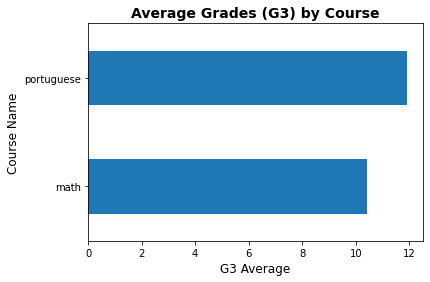

In [11]:
# plot the matrix using seaborn heatmap
fig, ax = plt.subplots()

groupby_course['G3'].plot(kind='barh', ax=ax, )

ax.set_title("Average Grades (G3) by Course", fontdict={'size': 14, 'weight': 'bold'})
ax.set_xlabel("G3 Average", fontsize=12)
ax.set_ylabel("Course Name", fontsize=12);

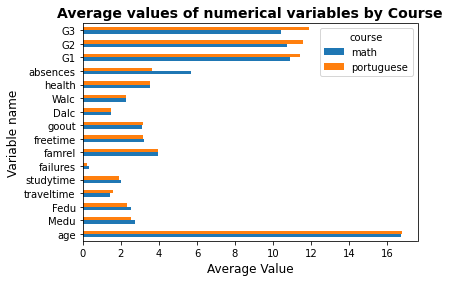

In [12]:
fig, ax = plt.subplots()

groupby_course.T.plot(kind='barh', ax=ax, sort_columns=True);

ax.set_title("Average values of numerical variables by Course", fontdict={'size': 14, 'weight': 'bold'})
ax.set_xlabel("Average Value", fontsize=12)
ax.set_ylabel("Variable name", fontsize=12);

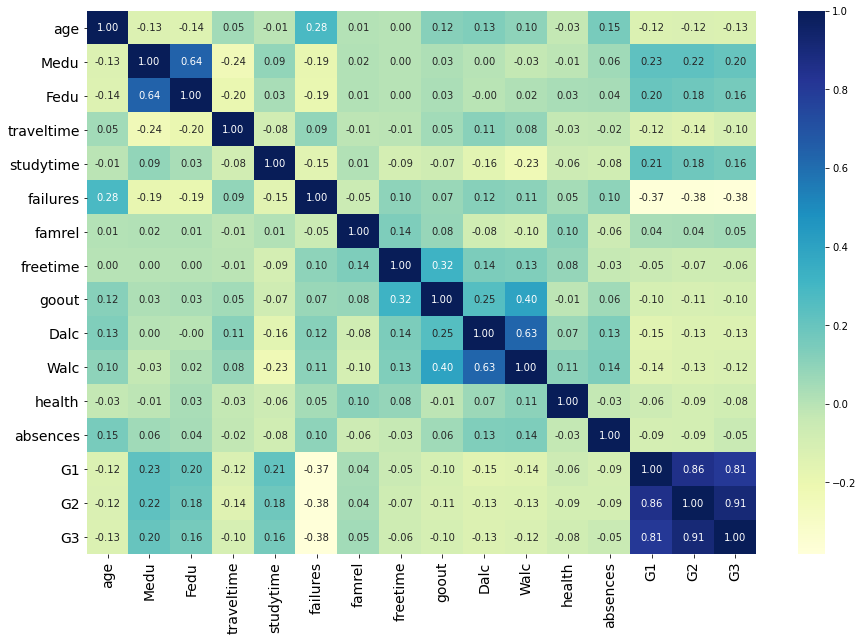

In [13]:
# Plotting the correlation matrix
df = data.copy()

# converting to ones and zeros
# df['diagnosis'] = data["diagnosis"].replace({"M": 1, "B": 0})

# create a correlation matrix
correlation_matrix = df.corr()

# plot the matrix using seaborn heatmap
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='YlGnBu',
            ax=ax);

plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14);

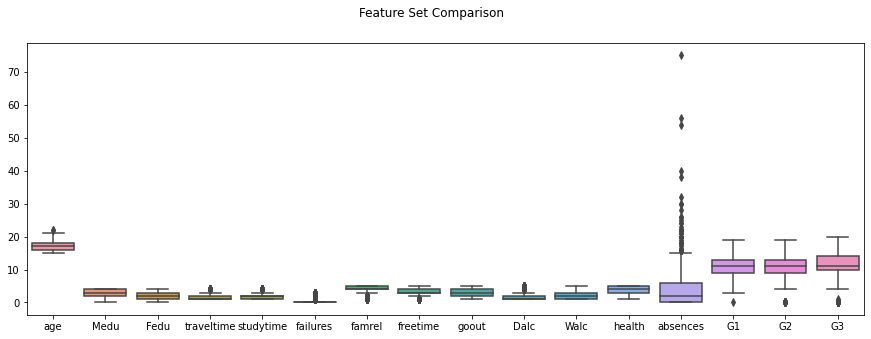

In [14]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=data._get_numeric_data())
plt.show()

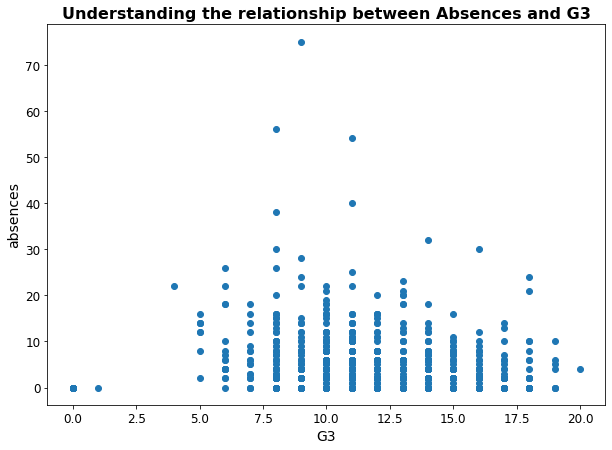

In [15]:
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(x=data['G3'], y=data['absences'])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_title("Understanding the relationship between Absences and G3", fontdict={'size': 16, 'weight':'bold'})
ax.set_xlabel("G3", fontsize=14)
ax.set_ylabel("absences", fontsize=14);

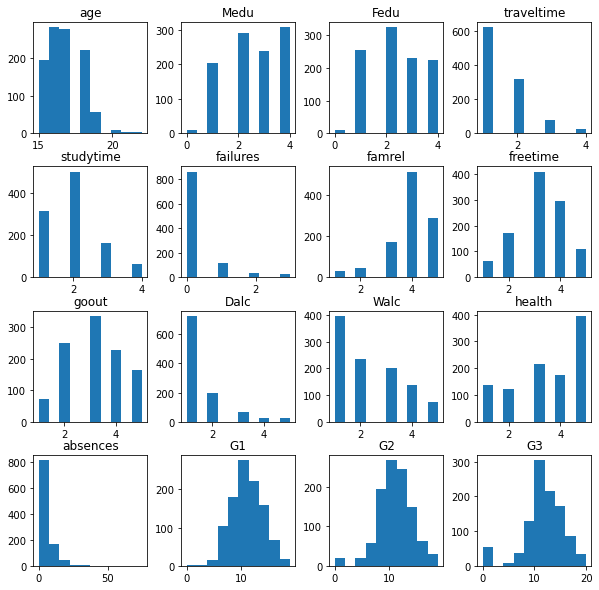

In [16]:
# Plotting histograms
data.hist(grid=False, figsize=(10,10));

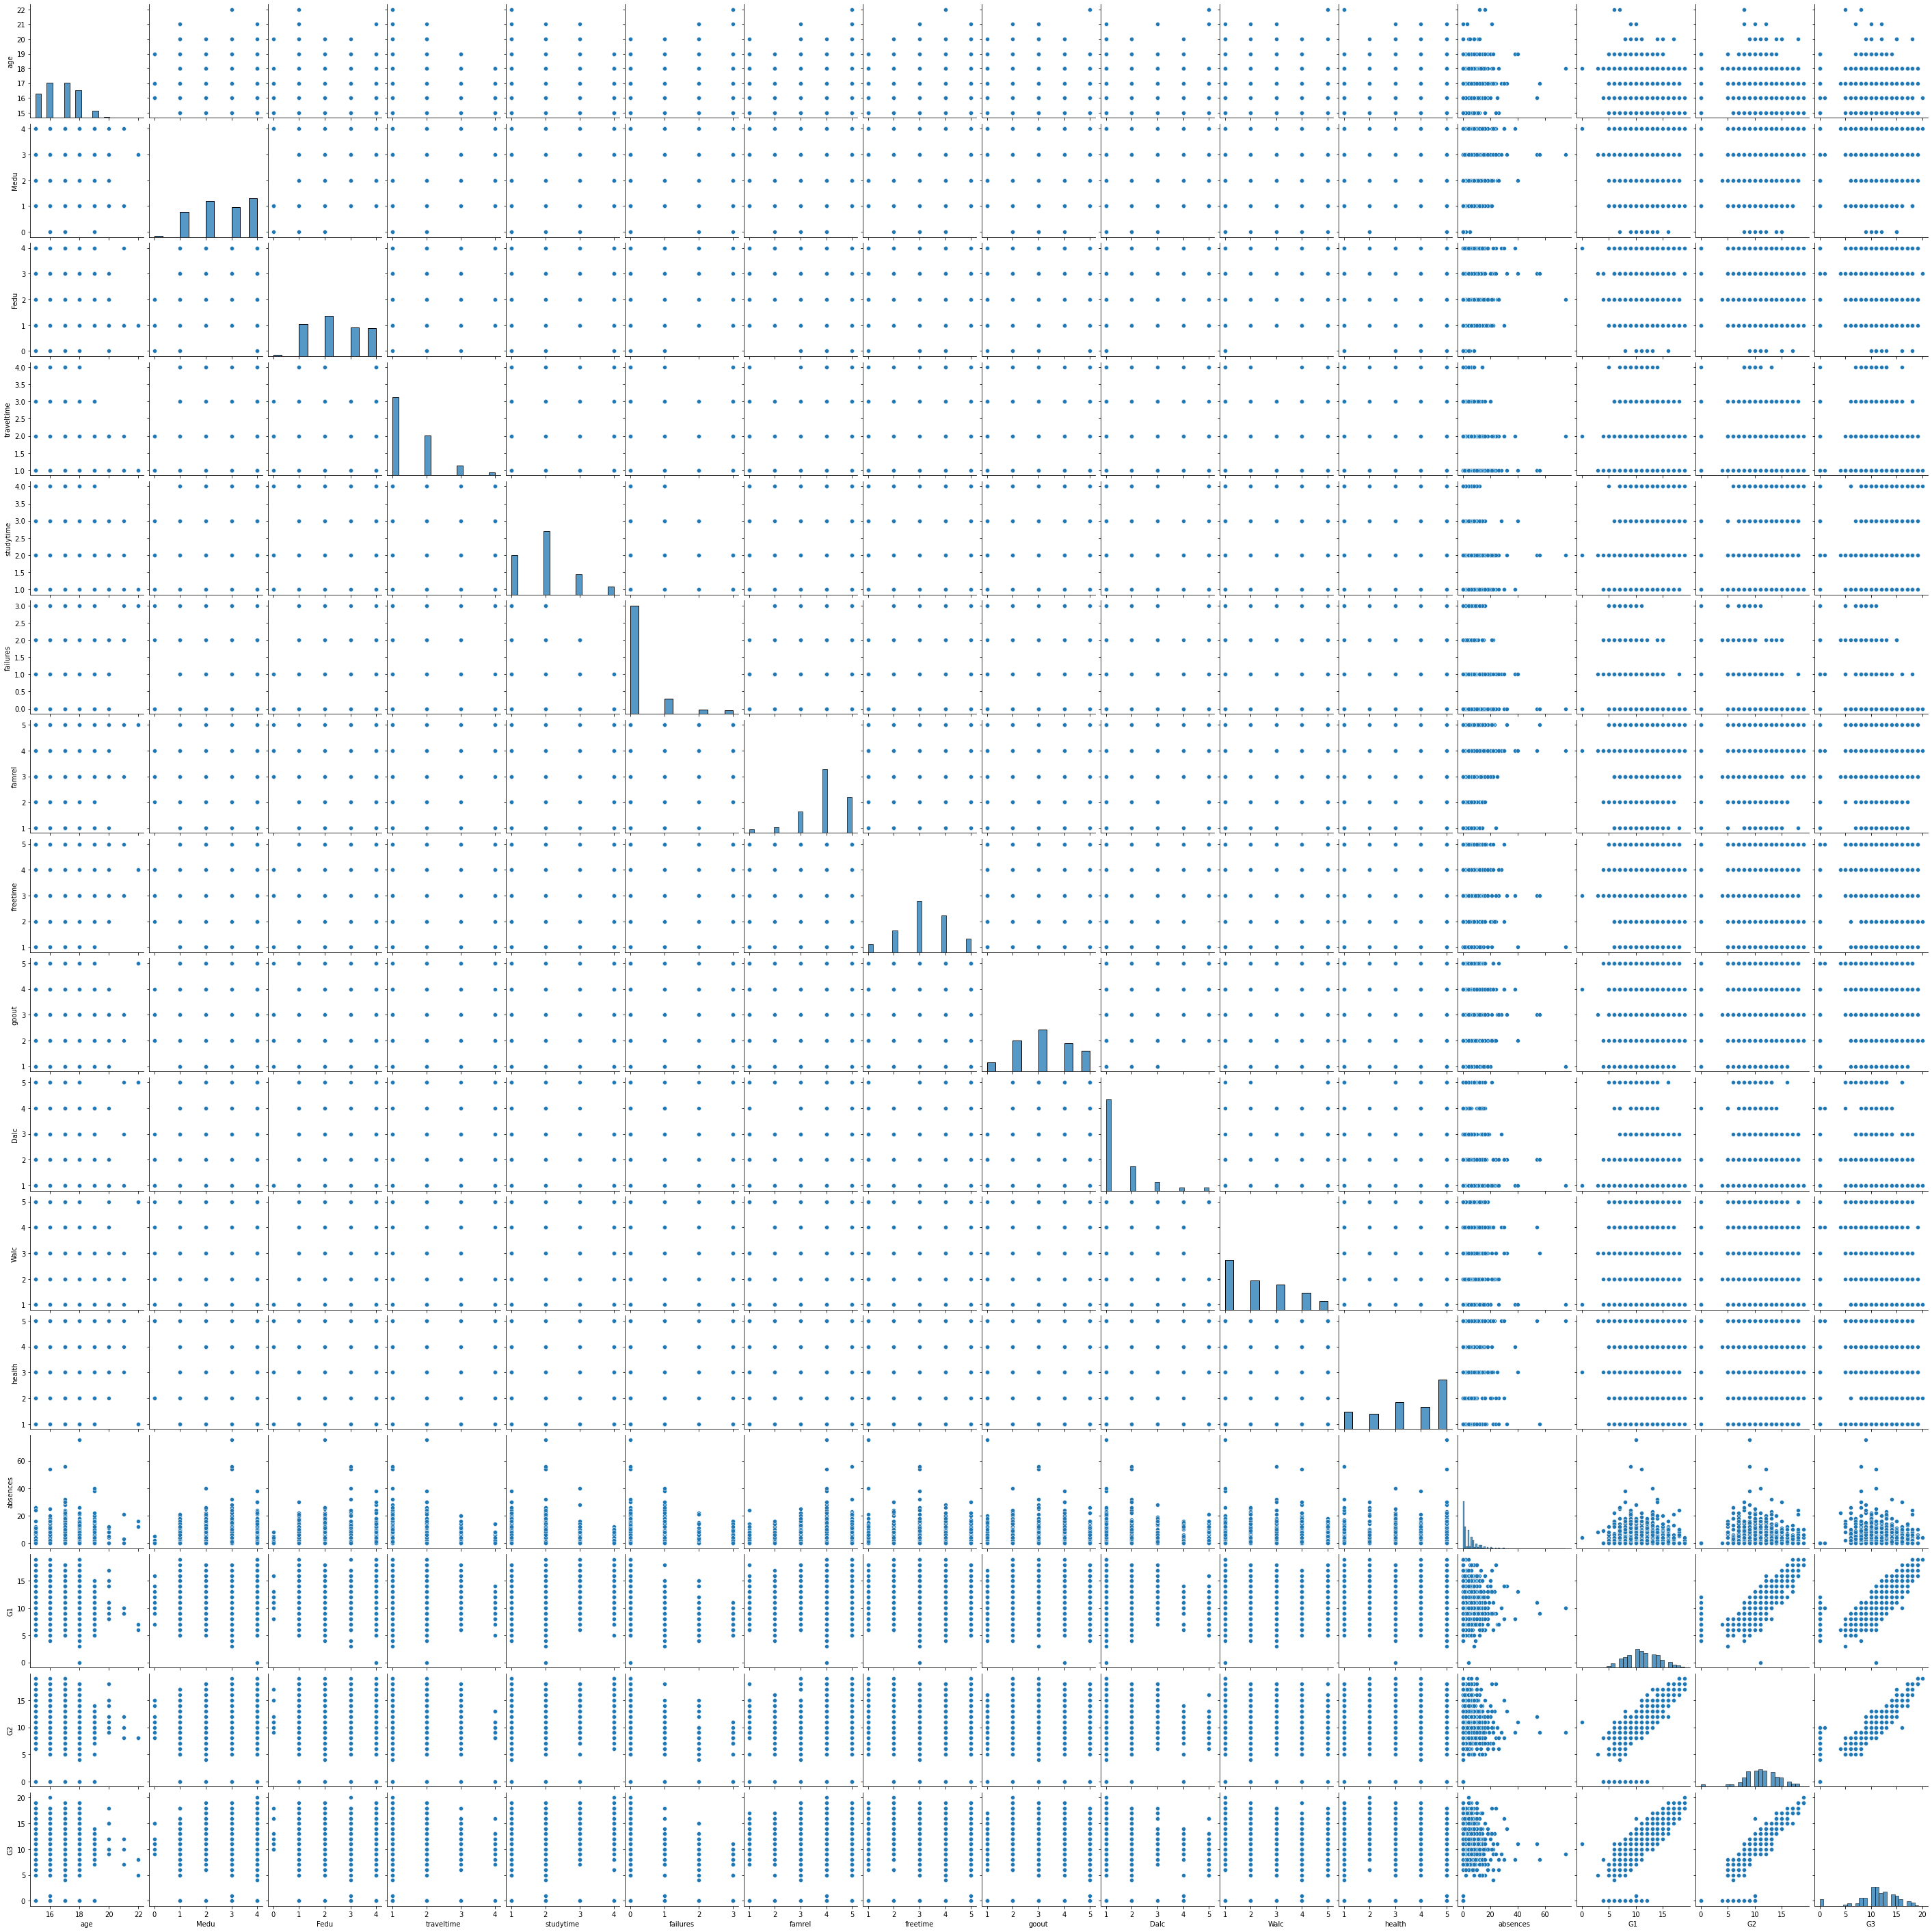

In [17]:
sns.pairplot(data)

Two assumptions will be checked before applying the regression model to dataset:
1. Multicolinearity - `VIF`
2. Normal distribution of error terms - `QQ plot`

In [18]:
#VIF Factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = data._get_numeric_data() #This line will drop non-numeric cols
x = df.drop('G3',axis=1)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values.astype(np.float), i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif.sort_values('VIF Factor')

,VIF Factor,features
5,1.504068,failures
12,1.611638,absences
3,5.617128,traveltime
9,6.290331,Dalc
4,7.257896,studytime
11,7.385266,health
10,8.103103,Walc
2,9.901142,Fedu
1,11.340079,Medu
8,11.537831,goout


In [19]:
# variables with a VIF values higher than 10 are usually a concern.
vif[vif['VIF Factor'] > 10]

,VIF Factor,features
0,57.061208,age
1,11.340079,Medu
6,19.349372,famrel
7,12.132417,freetime
8,11.537831,goout
13,59.140642,G1
14,49.799753,G2


From the above VIF factors, we know that `age`, `Medu`, `famrel`, `freetime` and `goout` are variables that might need to be taken care of when creating the regression model.

> *__Note__: `G1` and `G2` are not a concern as they are grades of period 1 and 2, respectively. Hence, they are bound to be highly correlated, but as essential when making predictions for `G3`.

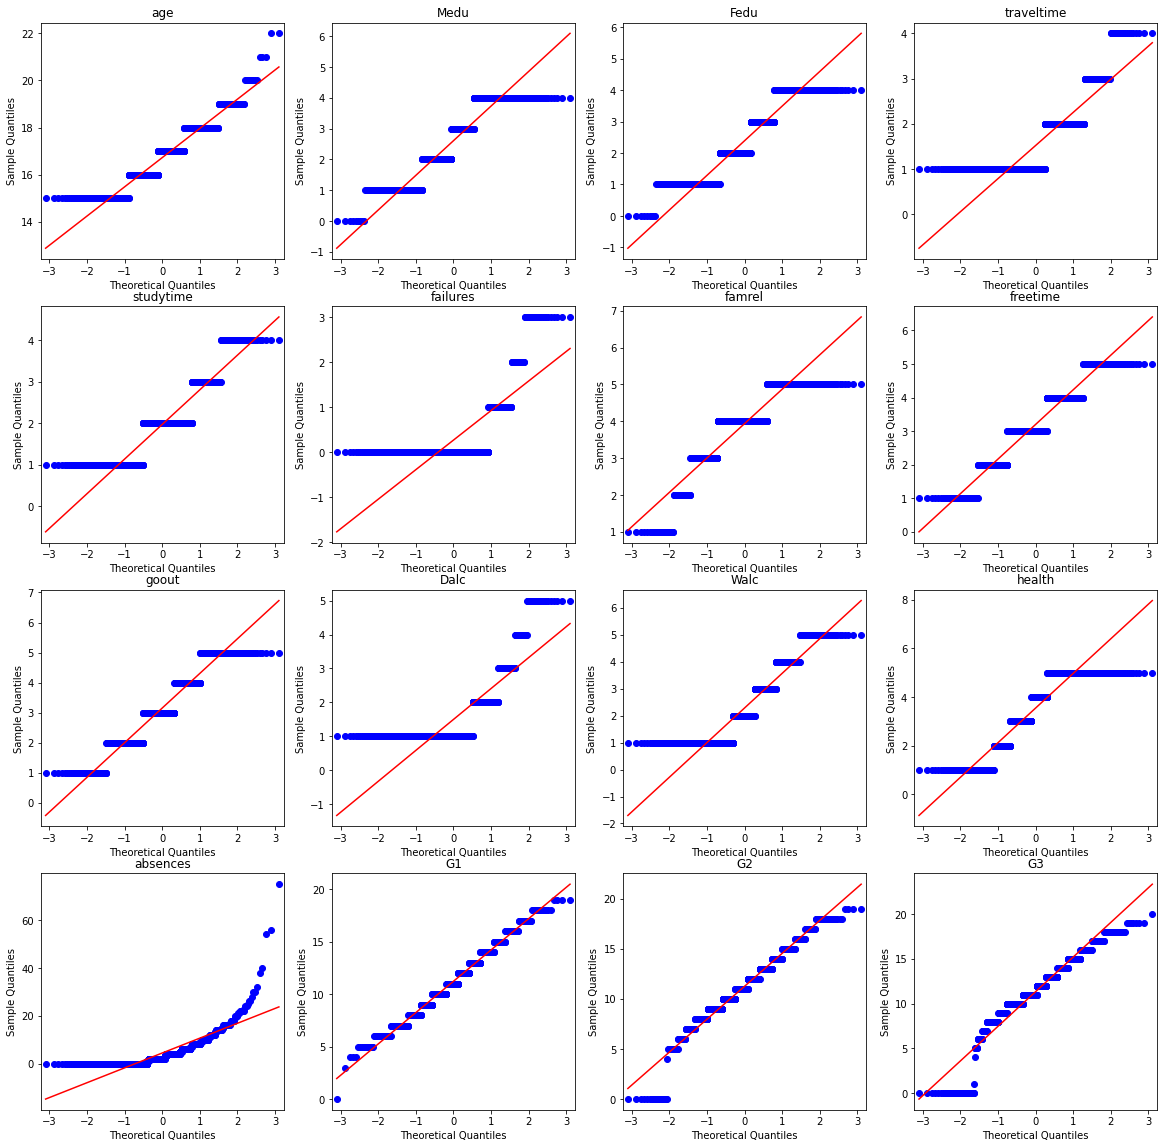

In [20]:
#Create Q-Q Plot
from statsmodels.graphics.gofplots import qqplot
import pylab

columns = np.array(data._get_numeric_data().columns).reshape(4,4)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))

for row in range(4):
    for col in range(4):
        column_name = columns[row][col]
        qqplot(data[column_name], line='s', ax=axes[row][col])
        axes[row][col].set_title(column_name)

pylab.show()

<AxesSubplot:xlabel='G3', ylabel='Density'>

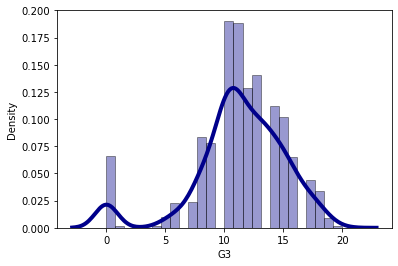

In [21]:
#Density Plot and Histogram of Output Variable
sns.distplot(data['G3'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

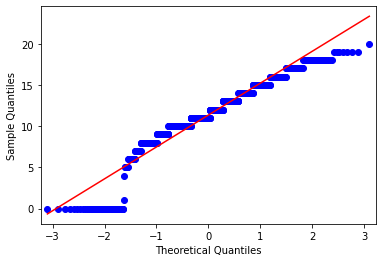

In [22]:
#Create Q-Q Plot
from statsmodels.graphics.gofplots import qqplot
import pylab
qqplot(data['G3'],line='s')
pylab.show()

In [23]:
#Normality test - Shapiro-Wilk Test

#   p <= alpha(0.05): reject H0, not normal.
#   p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro
stat, p = shapiro(data['G3'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.918, p=0.000
Sample does not look Gaussian (reject H0)


> __The response variable does not have a Gaussian distribution and this could be a concern when using a regression model.__

Apart from absences, all variables seem to have a normal distribution of errors.

In [24]:
from scipy.stats import shapiro


for col in data._get_numeric_data().columns:
    stat, p = shapiro(data[col])
    print(f'\nVariable: {col}')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')


Variable: age
Statistics=0.914, p=0.000
Sample does not look Gaussian (reject H0)

Variable: Medu
Statistics=0.868, p=0.000
Sample does not look Gaussian (reject H0)

Variable: Fedu
Statistics=0.877, p=0.000
Sample does not look Gaussian (reject H0)

Variable: traveltime
Statistics=0.702, p=0.000
Sample does not look Gaussian (reject H0)

Variable: studytime
Statistics=0.829, p=0.000
Sample does not look Gaussian (reject H0)

Variable: failures
Statistics=0.457, p=0.000
Sample does not look Gaussian (reject H0)

Variable: famrel
Statistics=0.823, p=0.000
Sample does not look Gaussian (reject H0)

Variable: freetime
Statistics=0.909, p=0.000
Sample does not look Gaussian (reject H0)

Variable: goout
Statistics=0.912, p=0.000
Sample does not look Gaussian (reject H0)

Variable: Dalc
Statistics=0.600, p=0.000
Sample does not look Gaussian (reject H0)

Variable: Walc
Statistics=0.846, p=0.000
Sample does not look Gaussian (reject H0)

Variable: health
Statistics=0.842, p=0.000
Sample does

<a id="class-data"></a>
# 3. Classifiers and Datasets
In this section, we will prepare the dataset by splitting into train and test sets.


<a id="data-prep"></a>
## 3.1 Data Preparation
The following cell is take from [Mostafa Massoud](https://www.kaggle.com/mostafafathy4869/student-performance-data-visualization?scriptVersionId=61575831&cellId=8) Jupyter Notebook.

In [25]:
#creating catagorical columns list and numeric columns list
cat_columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
               'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic',
               'Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health']

cont_columns = ['age','failures','absences','G1','G2']
target_column = ['G3']

- `x`: array of features.
- `y`: array of responses (or the values to be predicted).

In [26]:
# Define x and y variables for the algorithm
X = data.drop('G3', axis=1)
y = data['G3']

In [27]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [28]:
from sklearn.preprocessing import LabelEncoder


X_train_transformed = pd.concat([
    X_train[cat_columns].apply(LabelEncoder().fit_transform),
    X_train[cont_columns]
], axis=1)
           
X_test_transformed = pd.concat([
    X_test[cat_columns].apply(LabelEncoder().fit_transform),
    X_test[cont_columns]
], axis=1)

<a id="model-train"></a>
## 3.2 Model Training

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [30]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lm = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearRegression())])
pipeline.insert(0,pipe_lm)

# Set grid search params 

modelpara =[]

param_gridlm = {'clf__fit_intercept':[True,False],
             'clf__normalize':[True,False], 
             'clf__copy_X':[True, False]}
modelpara.insert(0,param_gridlm)

<a id="model-eval"></a>
# 4. Model Evaluation

In [31]:
# Make predictions
predictions = regressor.predict(X_test_transformed)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f'Score (R2): {r2: 0.2}')

Score (R2):  0.86


In [32]:
#Learning Curve
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=X_train_transformed, 
                                                            y=y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_mean_squared_error',
                                                            cv=10,
                                                            n_jobs=1,random_state=100)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.title("Linear Regressor Learning Curve")
#     plt.ylim([0,25])
    plt.show()

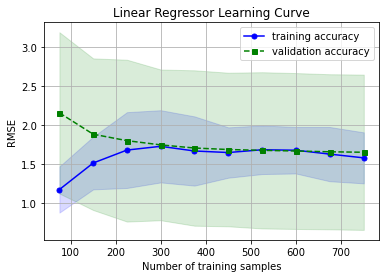

In [33]:
plot_learning_curves(regressor)

In [34]:
#Create Model
from sklearn import metrics

for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(X_train_transformed,y_train)
    predict = method.predict(X_test_transformed)

print('\nOriginal Model')
print('\nMethod: {}'.format(name))   

#Coefficents
print('\nIntercept: {:.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),X_train_transformed.columns,columns=['Coefficients'])
print(coeff_table)
    
#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,predict)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Original Model

Method: Linear regression

Intercept: -0.03
            Coefficients
school          0.153945
sex            -0.067962
address         0.149057
famsize        -0.032179
Pstatus        -0.212053
Mjob           -0.047701
Fjob           -0.098136
reason         -0.024546
guardian        0.076208
schoolsup       0.049371
famsup          0.290970
paid           -0.409622
activities     -0.115847
nursery        -0.063898
higher         -0.059941
internet       -0.016283
romantic       -0.135694
Medu            0.010381
Fedu           -0.004218
traveltime      0.101933
studytime       0.013985
famrel          0.084556
freetime       -0.002754
goout           0.003266
Dalc           -0.049022
Walc            0.029272
health          0.007344
age            -0.070502
failures       -0.173534
absences        0.032841
G1              0.139737
G2              0.974964

R2: 0.86
Adj_R2: 0.85
Mean Absolute Error: 0.94
Mean Squared Error: 1.94
Root Mean Squared Error: 1.39


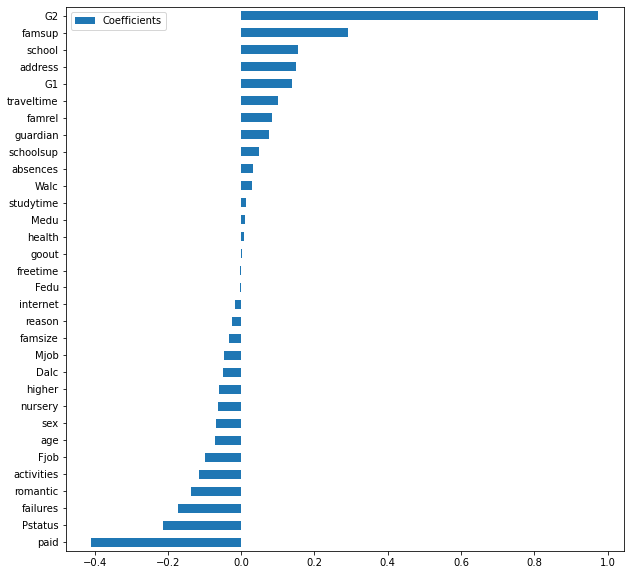

In [35]:
coeff_table.sort_values('Coefficients').plot(kind='barh', figsize=(10,10));

In [36]:
# Top 10 Variables that have a positive impact on the grades
coeff_table.sort_values('Coefficients', ascending=False)[:10]

,Coefficients
G2,0.974964
famsup,0.290970
school,0.153945
address,0.149057
G1,0.139737
traveltime,0.101933
famrel,0.084556
guardian,0.076208
schoolsup,0.049371
absences,0.032841


In [37]:
# Top 10 variables that have a negative impact on grades
coeff_table.sort_values('Coefficients')[:10]

,Coefficients
paid,-0.409622
Pstatus,-0.212053
failures,-0.173534
romantic,-0.135694
activities,-0.115847
Fjob,-0.098136
age,-0.070502
sex,-0.067962
nursery,-0.063898
higher,-0.059941


Model Evaluation - RMSE
Linear Regression 1.59




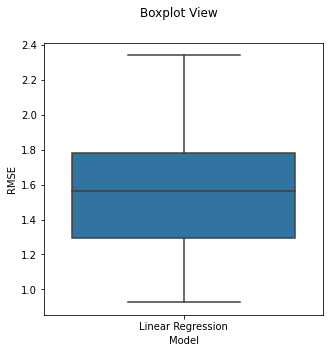

In [38]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Linear Regression',pipe_lm))

#Model Evaluation
results =[]
names=[]
scoring ='neg_mean_squared_error'
print('Model Evaluation - RMSE')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,pd.get_dummies(X),y,cv=rkf,scoring=scoring)
    results.append(np.sqrt(-cv_results))
    names.append(name)
    print('{} {:.2f}'.format(name,np.sqrt(-cv_results.mean())))
print('\n')

fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

In [39]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='neg_mean_squared_error')
    gs_clf = gs_clf.fit(X_train_transformed, y_train)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(X_test_transformed)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
   
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    
    #Test data accuracy of model with best params    
    print('\nIntercept: {:.2f}'.format(float(gs_clf.best_estimator_.named_steps['clf'].intercept_)))
    print('\nModel coefficients: ')   
    for name, score in zip(list(data.drop('G3',axis=1)),
                           gs_clf.best_estimator_.named_steps['clf'].coef_):
         print(name, round(score,2)) 
    
    #Print R2
    print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test,y_pred)))
    adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1)
    print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

    #Print MSE and RMSE
    print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
    print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))) 
    

In [40]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: LinearRegression()

Best Parameters: {'clf__copy_X': True, 'clf__fit_intercept': True, 'clf__normalize': False}

Intercept: 11.30

Model coefficients: 
school 0.07
sex -0.03
age 0.07
address -0.01
famsize -0.07
Pstatus -0.06
Medu -0.08
Fedu -0.03
Mjob 0.04
Fjob 0.02
reason 0.14
guardian -0.17
traveltime -0.06
studytime -0.03
failures -0.02
schoolsup -0.01
famsup -0.06
paid 0.01
activities -0.0
nursery 0.07
higher 0.01
internet 0.08
romantic -0.0
famrel 0.0
freetime -0.04
goout 0.04
Dalc 0.01
Walc -0.09
health -0.11
absences 0.2
G1 0.42
G2 3.18

R2: 0.86
Adj_R2: 0.85
Mean Absolute Error: 0.94
Mean Squared Error: 1.94
Root Mean Squared Error: 1.39


# External Dataset

## Load Data

In [41]:
ex_data = pd.read_csv('../data/StudentsPerformance.csv')
ex_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Exploratory Data Analysis

In [42]:
ex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [43]:
ex_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [44]:
ex_data.drop(['math score', 'reading score', 'writing score'], axis=1).describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


Two variables that are common between the two datasets: `gender` and `parental level of education`.

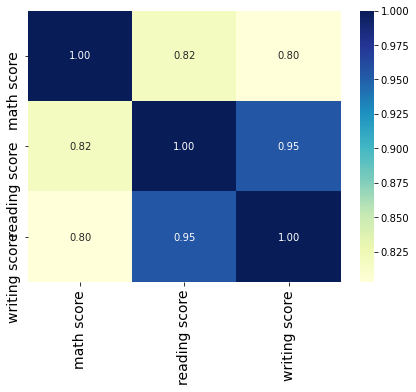

In [45]:
# Plotting the correlation matrix
df = ex_data.copy()

# converting to ones and zeros
# df['diagnosis'] = data["diagnosis"].replace({"M": 1, "B": 0})

# create a correlation matrix
correlation_matrix = df.corr()

# plot the matrix using seaborn heatmap
fig, ax = plt.subplots(figsize=(7,5))

sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='YlGnBu',
            ax=ax);

plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14);

The correlation matrix shows that reading and writing scores are similar and can be considered to be language scores.

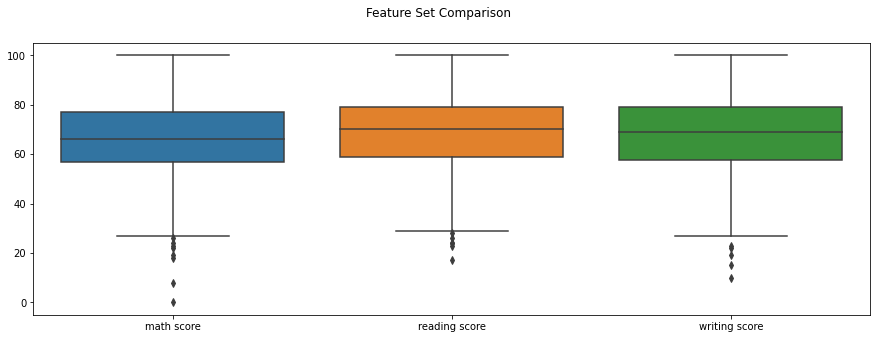

In [46]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=ex_data._get_numeric_data())
plt.show()

Some outliers present in all three scores.

In [47]:
# Generate three SweetViz reports.
# if not pathlib.Path("SWEETVIZ_REPORT.html").exists():
sv_report = sv.analyze(ex_data, target_feat='math score')
sv_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [48]:
#VIF Factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = ex_data._get_numeric_data() #This line will drop non-numeric cols
x = df.drop('math score',axis=1)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values.astype(np.float), i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif.sort_values('VIF Factor')

,VIF Factor,features
0,237.28935,reading score
1,237.28935,writing score


Reading and writing scores have very high VIF value.

<AxesSubplot:xlabel='math score', ylabel='Density'>

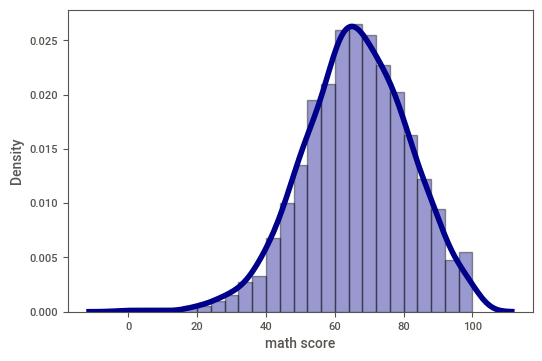

In [63]:
#Density Plot and Histogram of Output Variable
sns.distplot(ex_data['math score'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

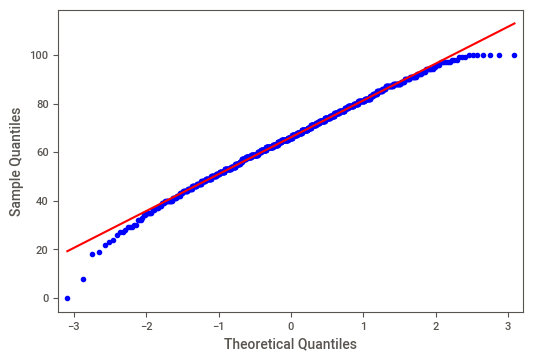

In [64]:
#Create Q-Q Plot
from statsmodels.graphics.gofplots import qqplot
import pylab
qqplot(ex_data['math score'],line='s')
pylab.show()

In [51]:
#Normality test - Shapiro-Wilk Test

#   p <= alpha(0.05): reject H0, not normal.
#   p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro
stat, p = shapiro(ex_data['math score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)


## Model Training and Evaluation

In [91]:
cat_columns = ['gender', 'race/ethnicity', 'parental level of education', 
              'lunch', 'test preparation course']
num_columns = ['reading score', 'writing score']

In [92]:
#Create Standard Model

#Define x and y variable
X2 = ex_data.drop('math score',axis=1)
y2 = ex_data['math score']

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train3 = pd.concat([
    X_train2[cat_columns].apply(LabelEncoder().fit_transform),
    X_train2[num_columns]
], axis=1)
           
X_test3 = pd.concat([
    X_test2[cat_columns].apply(LabelEncoder().fit_transform),
    X_test2[num_columns]
], axis=1)

#Model
from sklearn.linear_model import LinearRegression

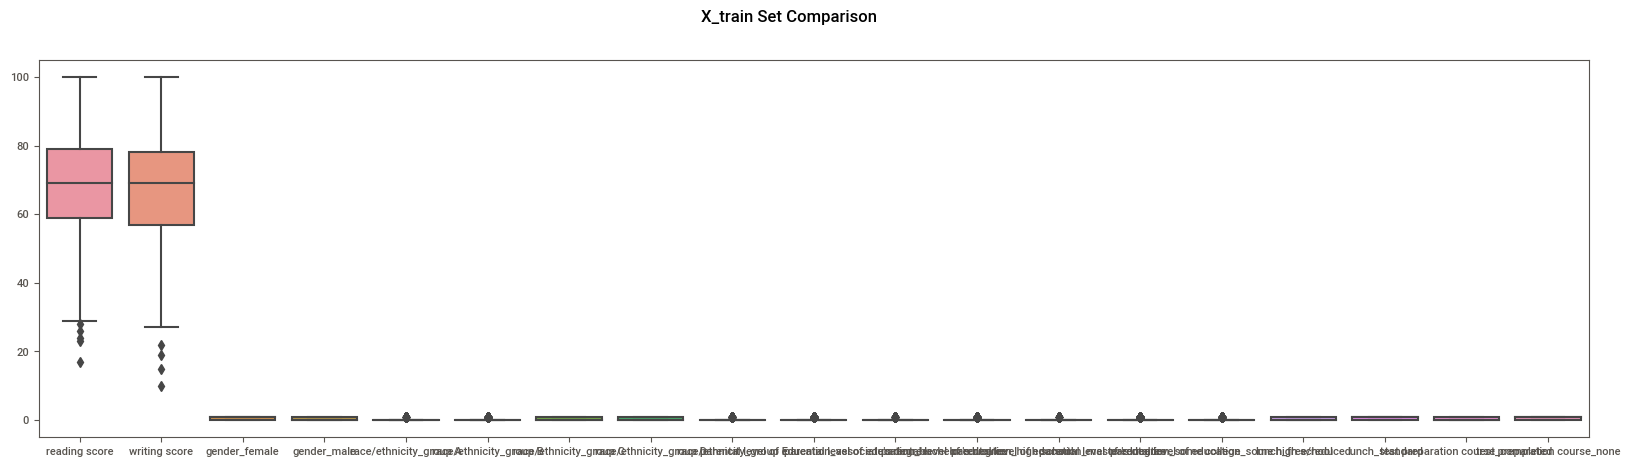

In [93]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(20,5))
fig.suptitle('X_train Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=pd.get_dummies(X_train2))
plt.show()

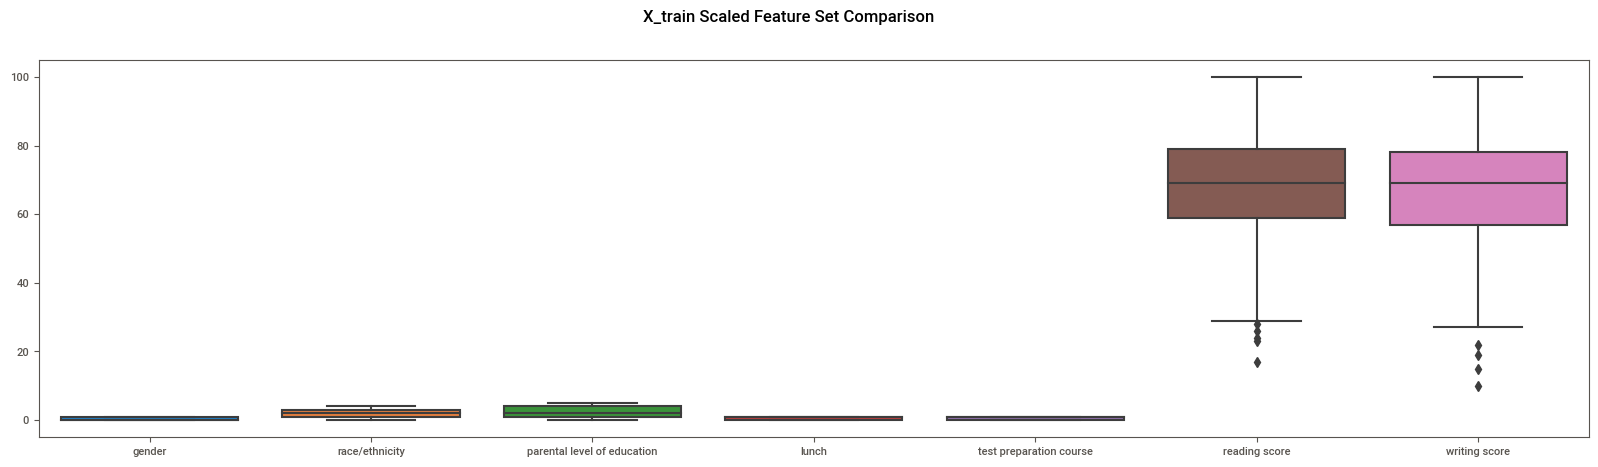

In [94]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(20,5))
fig.suptitle('X_train Scaled Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=X_train3)
plt.show()

In [95]:
#Create Model
from sklearn import metrics

for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(X_train3,y_train2)
    predict = method.predict(X_test3)

print('\nOriginal Model - External Data')
print('\nMethod: {}'.format(name))   

#Coefficents
print('\nIntercept: {:.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),X_train3.columns,columns=['Coefficients'])
print(coeff_table)
    
#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test2,predict)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test2,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test2, predict)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test2, predict)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test2, predict)))) 


Original Model - External Data

Method: Linear regression

Intercept: -11.97
                             Coefficients
gender                          13.309707
race/ethnicity                   0.765437
parental level of education      0.124703
lunch                            3.707283
test preparation course          2.995686
reading score                    0.307871
writing score                    0.646985

R2: 0.85
Adj_R2: 0.85
Mean Absolute Error: 4.55
Mean Squared Error: 31.80
Root Mean Squared Error: 5.64


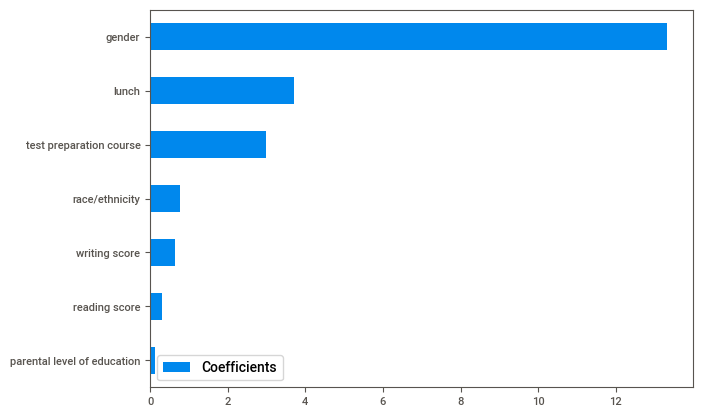

In [99]:
coeff_table.sort_values('Coefficients').plot(kind='barh', figsize=(7,5));

In [98]:
# Top 10 Variables that have a positive impact on the grades
coeff_table.sort_values('Coefficients', ascending=False)

,Coefficients
gender,13.309707
lunch,3.707283
test preparation course,2.995686
race/ethnicity,0.765437
writing score,0.646985
reading score,0.307871
parental level of education,0.124703
